# 🧩 시나리오 기반 프로젝트 실습 문제
## 🎓 AI 스타트업에서의 첫 실전 미션!

당신은 AI 스타트업 `InsightMind`의 신입 머신러닝 엔지니어입니다. 첫 출근과 동시에 두 가지 미션이 주어집니다:
- 부동산 기업의 주택 가격 예측 시스템 개발
- 식물원 전시를 위한 붓꽃 품종 분류기 개발

이 문제들은 실습 중심으로 구성되어 있으며, 각 단계에서 코드를 직접 작성하고 결과를 분석합니다.

## ✅ 미션 A. 데이터 준비 및 스케일링 요정의 조언
**🧙‍♀️ 요정 조언:** 거리 기반 모델들은 특성의 크기에 민감하단다. 스케일링을 안 하면 예측이 뒤틀릴 거야!

### 🔹 문제 A-1
왜 스케일링이 중요한지, 그 이유를 KNN과 연관지어 2가지 이상 설명하고 `StandardScaler` 또는 `MinMaxScaler` 예시 코드를 작성하세요.

스케일링이 중요한 이유는 KNN은 인접한 Neighbor의 특성을 기준으로 거리를 계산해서 판단하기 때문이다. 이때 각 특성의 값의 범위가 다르면, 범위가 큰 특성이 거리 계산에 더 큰 영향을 주게 된다. 따라서 특정 특성에 데이터가 몰려 있을 경우, 전체 예측이 그 특성에 편향되기 쉽다.

이를 해결하기 위해 Standard Scaler는 데이터를 평균 0, 표준편차 1로 정규 분표로 만들어주고, MinMaxScaler는 상한값과 하한값을 기준으로 데이터를 재분포시켜 거리 계산의 공정성을 높인다. 이렇게 하면 데이터가 한쪼긍로 치우치는 것을 방지하고, KNN이 모든 특성을 고르게 고려할 수 있다.

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# create biased data with age and salary
data = {
    'age': [22, 24, 25, 26, 27, 29, 55],         
    'income': [30000, 31000, 32000, 33000, 34000, 35000, 90000] 
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Standardize the data
df_standardized = standard_scaler.fit_transform(df)
print("\nStandardized DataFrame:")
print(df_standardized)

# Min-Max scale the data
df_minmax_scaled = minmax_scaler.fit_transform(df)
print("\nMin-Max Scaled DataFrame:")
print(df_minmax_scaled)


Original DataFrame:
   age  income
0   22   30000
1   24   31000
2   25   32000
3   26   33000
4   27   34000
5   29   35000
6   55   90000

Standardized DataFrame:
[[-0.73294914 -0.53086121]
 [-0.54292529 -0.48131417]
 [-0.44791336 -0.43176712]
 [-0.35290144 -0.38222007]
 [-0.25788951 -0.33267303]
 [-0.06786566 -0.28312598]
 [ 2.40244441  2.44196158]]

Min-Max Scaled DataFrame:
[[0.         0.        ]
 [0.06060606 0.01666667]
 [0.09090909 0.03333333]
 [0.12121212 0.05      ]
 [0.15151515 0.06666667]
 [0.21212121 0.08333333]
 [1.         1.        ]]


### 🔹 문제 A-2
`fetch_california_housing()`과 `load_iris()` 데이터를 불러와 train/test split하고 `StandardScaler`를 적용하여 전처리된 결과를 확인하세요.

In [17]:
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split

california = fetch_california_housing()
x_cal, y_cal = california.data, california.target
x_train_cal, x_test_cal, y_train_cal, y_test_cal = train_test_split(x_cal, y_cal, test_size=0.3, random_state=0)

# 표준화
hosing_standard = StandardScaler()
x_cal_train_scaled = hosing_standard.fit_transform(x_train_cal)
x_cal_test_scaled = hosing_standard.transform(x_test_cal)

print("\nStandardized California Housing Data:")
print(x_cal_train_scaled[:5])
print(x_cal_test_scaled[:5])

iris = load_iris()
x_iris, y_iris = iris.data, iris.target
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(x_iris, y_iris, test_size=0.3, random_state=0)

# 표준화
iris_standard = StandardScaler()
x_iris_train_scaled = iris_standard.fit_transform(x_train_iris)
x_iris_test_scaled = iris_standard.transform(x_test_iris)

print("\nStandardized Iris Data:")
print(x_iris_train_scaled[:5])
print(x_iris_test_scaled[:5])




Standardized California Housing Data:
[[-1.00030408e+00  1.85620980e+00 -1.14682300e+00 -8.71975288e-01
  -1.07186955e+00  2.59828287e-01  5.13963868e-01 -1.11313968e-01]
 [-8.49386019e-01  1.14171192e+00 -7.65854761e-01  1.97334926e-01
  -5.12515556e-01 -3.27132332e-03  9.99934624e-01 -1.31738380e+00]
 [ 1.28620508e+00 -9.22393073e-01  4.61027223e-01 -1.51583971e-02
  -3.31935474e-02  1.12103925e-01 -8.22455710e-01  7.60843966e-01]
 [-1.13519966e+00 -9.22393073e-01 -1.27009952e+00  2.23585256e-01
   1.41434152e+00  1.52625950e-03 -7.33672591e-01  6.41233735e-01]
 [-8.70432056e-01  1.69743250e+00 -3.50004428e-01  1.47772127e-01
  -7.12595523e-01  8.56480538e-02  5.13963868e-01 -1.21281488e-01]]
[[ 0.15077666 -0.5254498   0.10477153 -0.04263662  0.10947217  0.16599986
  -1.42524636  1.25423617]
 [ 1.01154901  0.26843673  0.29893351 -0.3689475  -0.11235562 -0.00284492
  -0.79909173  0.79573028]
 [ 0.25489638  0.03027077  0.22177006 -0.15142947  0.11208191 -0.01898759
   1.41114065 -1.13

## ✅ 미션 B. 부동산 부자의 질문: “우리 집 값 얼마야?”
### 🔹 문제 B-1
KNN 회귀기를 사용해 주택 가격을 예측하고, `k=3,5,7`일 때 R² 점수를 비교하세요.

### 🔹 문제 B-2
`y_test` vs `y_pred` 산점도 그래프를 시각화하여 모델 성능을 직관적으로 확인하세요.

### 🔹 문제 B-3
R² 점수가 의미하는 바와 0.85, -0.3의 의미를 해석하세요.

In [18]:
# 문제 B-1
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score 

clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(x_cal_train_scaled, y_train_cal)
y_pred = clf.predict(x_cal_test_scaled)
print("\nKNN Regression R^2 Score with k=3:")
print(r2_score(y_test_cal, y_pred))

clf = KNeighborsRegressor(n_neighbors=5)
clf.fit(x_cal_train_scaled, y_train_cal)
y_pred = clf.predict(x_cal_test_scaled)
print("\nKNN Regression R^2 Score with k=5:")
print(r2_score(y_test_cal, y_pred))

clf = KNeighborsRegressor(n_neighbors=7)
clf.fit(x_cal_train_scaled, y_train_cal)
y_pred = clf.predict(x_cal_test_scaled)
print("\nKNN Regression R^2 Score with k=7:")
print(r2_score(y_test_cal, y_pred))


KNN Regression R^2 Score with k=3:
0.6578804319574116

KNN Regression R^2 Score with k=5:
0.6771674385381518

KNN Regression R^2 Score with k=7:
0.6860187268770883


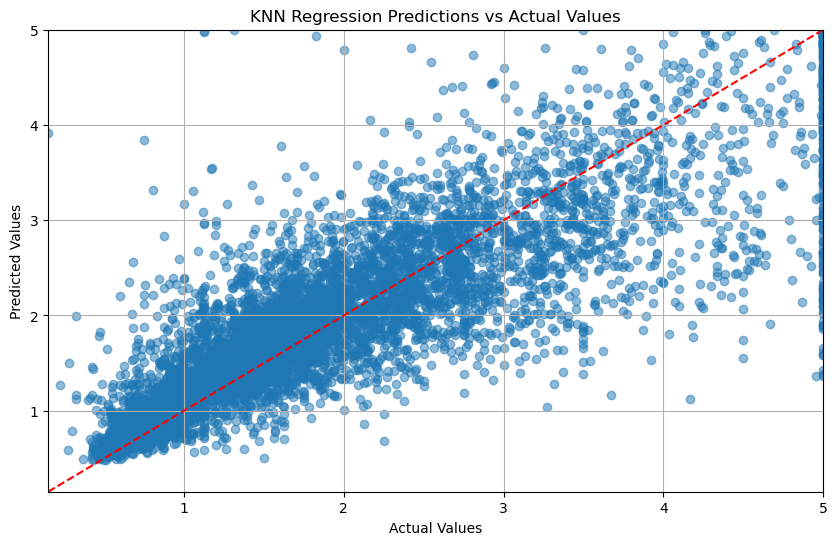

In [19]:
# 문제 B-2
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test_cal, y_pred, alpha=0.5)
plt.title("KNN Regression Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_test_cal.min(), y_test_cal.max()], [y_test_cal.min(), y_test_cal.max()], 'r--')
plt.xlim(y_test_cal.min(), y_test_cal.max())
plt.ylim(y_test_cal.min(), y_test_cal.max())
plt.grid(True)
plt.show()

R²의 범위는 (-∞, 1]이며, 1에 가까울수록 실제 값과 유사한 예측을 한다는 의미이다. 반면, 값이 0보다 작을수록 단순 평균값으로 예측하는 것보다도 못한 성능을 보이는 것으로, 해당 모델은 적절하지 않다고 판단할 수 있다.

## ✅ 미션 C. 붓꽃 전시회 준비!
### 🔹 문제 C-1
KNeighborsClassifier를 이용해 붓꽃 품종을 분류하고 정확도를 계산하세요.

### 🔹 문제 C-2
Confusion Matrix를 출력하고, 어떤 클래스끼리 혼동되었는지 시각적으로 분석하세요.

In [20]:
# use kneighbosclassifier to split flower type and calculate accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_iris_train_scaled, y_train_iris)
y_pred = clf.predict(x_iris_test_scaled)
print("\nKNN Classification Accuracy with k=3:")
print(accuracy_score(y_test_iris, y_pred))


KNN Classification Accuracy with k=3:
0.9777777777777777


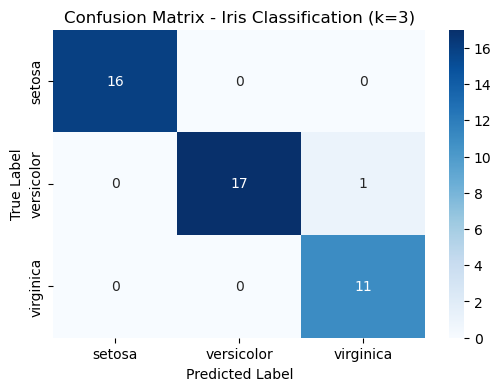

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix 계산
cm = confusion_matrix(y_test_iris, y_pred)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.title("Confusion Matrix - Iris Classification (k=3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## ✅ 미션 D. 의외의 실험: 선형 회귀도 써보자!
### 🔹 문제 D-1
`LinearRegression`을 적용해 같은 데이터를 예측하고, KNN과의 R² 점수와 구조적 차이를 비교하세요.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear Regression 모델 생성 및 학습
linear_reg = LinearRegression()
linear_reg.fit(x_cal_train_scaled, y_train_cal)

# 예측
y_pred_linear = linear_reg.predict(x_cal_test_scaled)

print("\nLinear Regression Predictions:")
print(y_pred_linear[:5])
print("\nActual Values:")
print(y_test_cal[:5])

# R² 점수 계산
r2_linear = r2_score(y_test_cal, y_pred_linear)
print("\nLinear Regression R² Score:")
print(r2_linear)





Linear Regression Predictions:
[2.2702672  2.79059912 1.90984782 1.03160505 2.98015599]

Actual Values:
[1.369 2.413 2.007 0.725 4.6  ]

Linear Regression R² Score:
0.5926087785518779


## KNN과의 구조적 차이 비교
KNN은 거리 기반의 비선형 모델로, 데이터의 지역적 패턴을 학습합니다.  
Linear Regression은 선형 모델로, 전체 데이터에 대해 선형 관계를 학습합니다.

## 🎁 보너스 질문
- 거리 기반 모델에서 스케일링이 필요한 이유는?
    - 거리 기반 모델은 데이터 간의 거리를 계산하여 예측을 수행한다. 이때, 각 특성의 값의 범위가 다르면, 값의 범위가 큰 특성이 거리 계산에 더 큰 영향을 미치게 됩니다. 이는 모델이 특정 특성에 편향되게 학습하도록 만들 수 있다.
    - 스케일링을 통해 모든 특성의 값을 동일한 범위로 조정하면, 각 특성이 거리 계산에 공정하게 기여할 수 있습니다.
- KNN이 데이터가 많아질수록 느려지는 이유는?
    - KNN은 새로운 데이터를 예측할 때, 학습 데이터 전체와의 거리를 계산해야 한다. 데이터가 많아질수록 계산해야 할 거리가 기하급수적으로 증가하므로, 예측 속도가 느려진다.
    - KNN은 학습 단계에서는 계산이 필요 없지만, 예측 단계에서 계산 비용이 매우 높은 모델이다.
- 이를 개선할 수 있는 방법은?
    - KD-Tree 또는 Ball-Tree: 데이터 구조를 활용하여 거리 계산을 효율적으로 수행할 수 있다. 특히 고차원 데이터에서는 Ball-Tree가 더 적합할 수 있다.
    - Approximate Nearest Neighbors (ANN): 정확한 이웃을 찾는 대신 근사치를 찾는 방법으로, 계산 속도를 크게 향상시킬 수 있다.
    - 차원 축소: PCA(Principal Component Analysis)와 같은 기법을 사용하여 데이터의 차원을 줄이면, 거리 계산의 복잡도를 낮출 수 있다.
    - 병렬 처리: 거리 계산을 병렬로 수행하여 속도를 높일 수 있다.